In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from prophet import Prophet
%matplotlib inline

In [3]:
df_train = pd.read_csv("./sales_data/train.csv")
df_train.date = pd.to_datetime(df_train['date'])
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


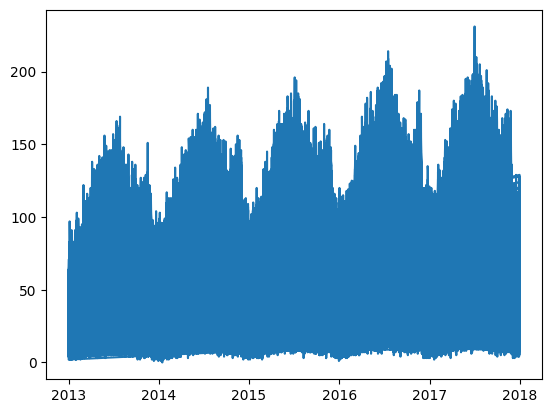

In [4]:
plt.plot(df_train.date, df_train.sales)

<Axes: xlabel='date'>

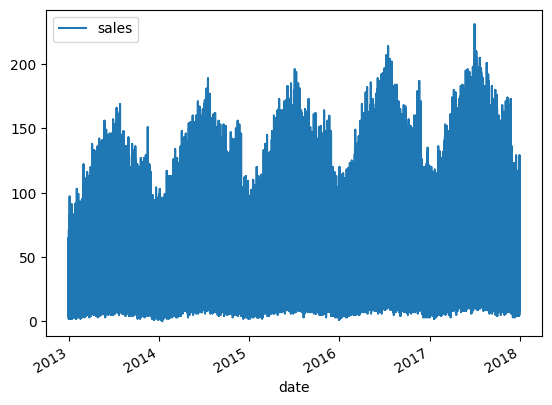

In [5]:
df_train.plot('date' , 'sales')

In [6]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day_of_week'] = df_train['date'].dt.day_of_week
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train.head()

,date,store,item,sales,year,month,day_of_week,dayofweek
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


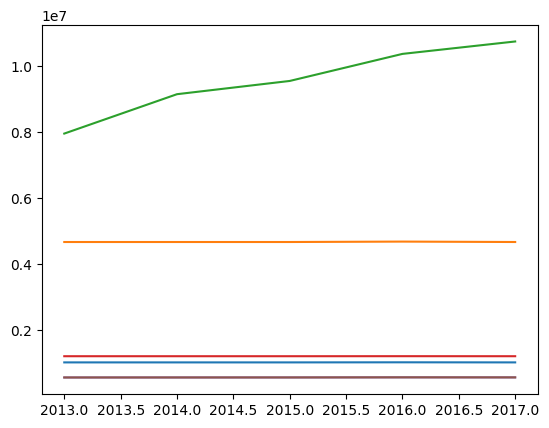

In [7]:
plt.plot(df_train.year.unique(), df_train.groupby('year').sum('sales'))

In [8]:
# instantiate the model and set parameters
model = Prophet(
 interval_width=0.95,
 growth='linear',
 daily_seasonality=False,
 weekly_seasonality=True,
 yearly_seasonality=True,
 seasonality_mode='multiplicative'
)

In [9]:
df_history = df_train[["date", "sales"]]
df_history.rename(columns={"date":'ds', "sales":'y'}, inplace=True)
df_history

C:\Users\emanuel.holgersson\AppData\Local\Temp\ipykernel_20604\643796824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_history.rename(columns={"date":'ds', "sales":'y'}, inplace=True)


,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [10]:
model.fit(df_history)

14:53:45 - cmdstanpy - INFO - Chain [1] start processing
14:56:07 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_pd = model.make_future_dataframe(
 periods=90,
 freq='d',
 include_history=True
)
future_pd

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1911,2018-03-27
1912,2018-03-28
1913,2018-03-29
1914,2018-03-30


In [12]:
# predict over the dataset
forecast_pd = model.predict(future_pd)
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,40.504695,-28.004361,79.688341,40.504695,40.504695,-0.350938,-0.350938,-0.350938,-0.076645,-0.076645,-0.076645,-0.274293,-0.274293,-0.274293,0.0,0.0,0.0,26.290050
1,2013-01-02,40.533879,-22.349973,78.432500,40.533879,40.533879,-0.349578,-0.349578,-0.349578,-0.073868,-0.073868,-0.073868,-0.275710,-0.275710,-0.275710,0.0,0.0,0.0,26.364135
2,2013-01-03,40.563064,-20.095805,76.429268,40.563064,40.563064,-0.286944,-0.286944,-0.286944,-0.009585,-0.009585,-0.009585,-0.277358,-0.277358,-0.277358,0.0,0.0,0.0,28.923753
3,2013-01-04,40.592248,-20.665856,81.984019,40.592248,40.592248,-0.223283,-0.223283,-0.223283,0.055906,0.055906,0.055906,-0.279189,-0.279189,-0.279189,0.0,0.0,0.0,31.528689
4,2013-01-05,40.621432,-17.754095,82.733977,40.621432,40.621432,-0.158165,-0.158165,-0.158165,0.122980,0.122980,0.122980,-0.281145,-0.281145,-0.281145,0.0,0.0,0.0,34.196546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2018-03-27,61.441153,1.481926,107.082544,60.211147,62.640167,-0.108753,-0.108753,-0.108753,-0.076645,-0.076645,-0.076645,-0.032108,-0.032108,-0.032108,0.0,0.0,0.0,54.759236
1912,2018-03-28,61.450885,0.771215,104.624199,60.201357,62.669295,-0.101370,-0.101370,-0.101370,-0.073868,-0.073868,-0.073868,-0.027503,-0.027503,-0.027503,0.0,0.0,0.0,55.221608
1913,2018-03-29,61.460617,11.308023,111.224785,60.195011,62.702925,-0.032240,-0.032240,-0.032240,-0.009585,-0.009585,-0.009585,-0.022655,-0.022655,-0.022655,0.0,0.0,0.0,59.479102
1914,2018-03-30,61.470349,11.852156,111.975832,60.185542,62.736556,0.038334,0.038334,0.038334,0.055906,0.055906,0.055906,-0.017572,-0.017572,-0.017572,0.0,0.0,0.0,63.826726


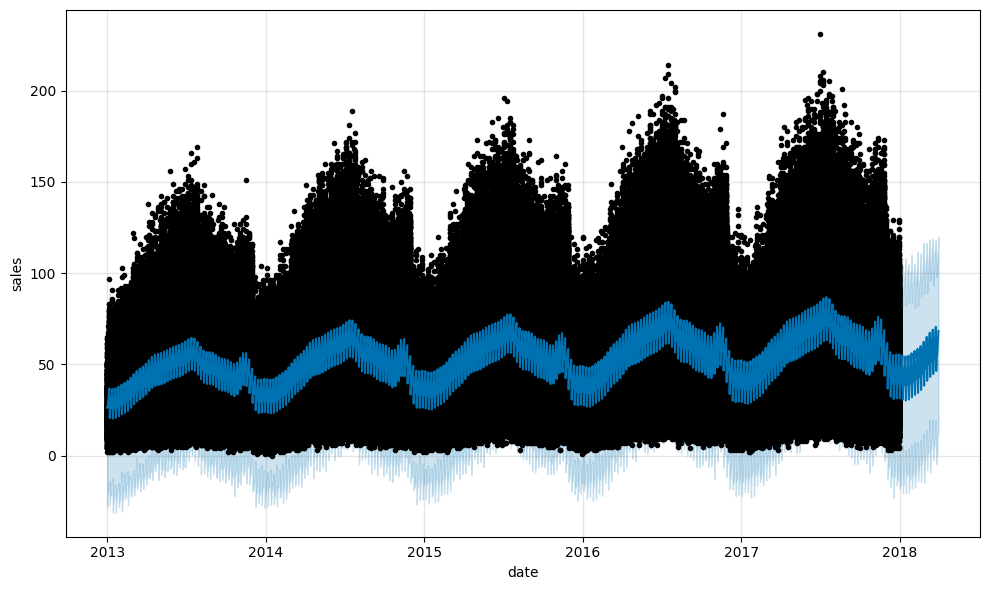

In [13]:
predict_fig = model.plot(forecast_pd, xlabel='date', ylabel='sales')